In [ ]:
import pandas as pd

data = pd.read_csv("sample_movielens_rating.dat", sep="::", names=["user", "item", "label", "time"])

In [22]:
from libreco.data import random_split, DatasetPure
import numpy as np
from libreco.evaluation import evaluate
import time

from libreco.algorithms import UserCF, ItemCF

trainData, evalData, testData = random_split(data, multi_ratios=[0.8, 0.1, 0.1])

trainData, dataInfo = DatasetPure.build_trainset(trainData)
evalData = DatasetPure.build_evalset(evalData)
testData = DatasetPure.build_testset(testData)

times = [{"cosine": [], "pearson": [], "jaccard": []}, {"cosine": [], "pearson": [], "jaccard": []}, {"cosine": [], "pearson": [], "jaccard": []}, {"cosine": [], "pearson": [], "jaccard": []}]

x = [i for i in np.arange(1, 31, 1)]

for i in np.arange(1, 31, 1):
    print(i)

    for simType in ["cosine", "pearson", "jaccard"]:
        userCf = UserCF(
            task="ranking",
            data_info=dataInfo,
            sim_type=simType,
            k_sim=i
        )
        start = time.time()
        userCf.fit(
            trainData,
            neg_sampling=True,
            verbose=2,
            eval_data=evalData,
            metrics=["loss", "roc_auc", "precision", "recall", "ndcg"]
        )
        end = time.time()

        times[0][simType].append(end - start)

        evaluation = evaluate(
            model=userCf,
            data=testData,
            neg_sampling=True,
            metrics=["roc_auc"]
        )

        times[1][simType].append(evaluation["roc_auc"])
        
        itemCf = ItemCF(
            task="ranking",
            data_info=dataInfo,
            sim_type=simType,
            k_sim=i
        )
        start = time.time()
        itemCf.fit(
            trainData,
            neg_sampling=True,
            verbose=2,
            eval_data=evalData,
            metrics=["loss", "roc_auc", "precision", "recall", "ndcg"]
        )
        end = time.time()

        times[2][simType].append(end - start)

        evaluation = evaluate(
            model=itemCf,
            data=testData,
            neg_sampling=True,
            metrics=["roc_auc"]
        )

        times[3][simType].append(evaluation["roc_auc"])

1
Training start time: 2023-10-07 23:41:14
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.129s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 12522.34it/s]


	 eval log_loss: 1.2638
	 eval roc_auc: 0.7303
	 eval precision@10: 0.0041
	 eval recall@10: 0.0184
	 eval ndcg@10: 0.0935


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


Training start time: 2023-10-07 23:41:16
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.045s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.70it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  7.02it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 8189.54it/s]


	 eval log_loss: 1.5361
	 eval roc_auc: 0.5440
	 eval precision@10: 0.0002
	 eval recall@10: 0.0007
	 eval ndcg@10: 0.0011


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]


Training start time: 2023-10-07 23:41:17
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.149s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.03it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 14271.61it/s]


	 eval log_loss: 1.6875
	 eval roc_auc: 0.7128
	 eval precision@10: 0.0013
	 eval recall@10: 0.0067
	 eval ndcg@10: 0.0151


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]


Training start time: 2023-10-07 23:41:19
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.056s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.97it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 8240.55it/s]


	 eval log_loss: 1.9346
	 eval roc_auc: 0.6053
	 eval precision@10: 0.0003
	 eval recall@10: 0.0008
	 eval ndcg@10: 0.0011


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]


Training start time: 2023-10-07 23:41:20
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.106s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 11222.47it/s]


	 eval log_loss: 1.6535
	 eval roc_auc: 0.7408
	 eval precision@10: 0.0027
	 eval recall@10: 0.0096
	 eval ndcg@10: 0.0359


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]


Training start time: 2023-10-07 23:41:22
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.035s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.69it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.98it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 8028.65it/s]


	 eval log_loss: 1.8866
	 eval roc_auc: 0.6214
	 eval precision@10: 0.0015
	 eval recall@10: 0.0056
	 eval ndcg@10: 0.0057


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.98it/s]


2
Training start time: 2023-10-07 23:41:23
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.120s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 12564.87it/s]


	 eval log_loss: 1.3109
	 eval roc_auc: 0.7409
	 eval precision@10: 0.0024
	 eval recall@10: 0.0087
	 eval ndcg@10: 0.0581


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]


Training start time: 2023-10-07 23:41:25
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.60it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 6508.14it/s]


	 eval log_loss: 1.5888
	 eval roc_auc: 0.5505
	 eval precision@10: 0.0003
	 eval recall@10: 0.0010
	 eval ndcg@10: 0.0011


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


Training start time: 2023-10-07 23:41:27
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.149s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 11147.13it/s]


	 eval log_loss: 1.7648
	 eval roc_auc: 0.7188
	 eval precision@10: 0.0024
	 eval recall@10: 0.0116
	 eval ndcg@10: 0.0216


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]


Training start time: 2023-10-07 23:41:29
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.057s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.47it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 6464.49it/s]


	 eval log_loss: 2.0255
	 eval roc_auc: 0.6071
	 eval precision@10: 0.0003
	 eval recall@10: 0.0013
	 eval ndcg@10: 0.0011


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]


Training start time: 2023-10-07 23:41:30
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.106s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 8621.34it/s]


	 eval log_loss: 1.7059
	 eval roc_auc: 0.7517
	 eval precision@10: 0.0033
	 eval recall@10: 0.0115
	 eval ndcg@10: 0.0283


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]


Training start time: 2023-10-07 23:41:32
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.036s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.52it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 6398.29it/s]


	 eval log_loss: 1.9412
	 eval roc_auc: 0.6351
	 eval precision@10: 0.0012
	 eval recall@10: 0.0057
	 eval ndcg@10: 0.0048


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


3
Training start time: 2023-10-07 23:41:33
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.127s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 11313.85it/s]


	 eval log_loss: 1.3475
	 eval roc_auc: 0.7424
	 eval precision@10: 0.0025
	 eval recall@10: 0.0094
	 eval ndcg@10: 0.0374


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]


Training start time: 2023-10-07 23:41:35
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.041s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.39it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4787.66it/s]


	 eval log_loss: 1.6289
	 eval roc_auc: 0.5521
	 eval precision@10: 0.0002
	 eval recall@10: 0.0004
	 eval ndcg@10: 0.0006


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Training start time: 2023-10-07 23:41:37
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.155s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 8509.11it/s]


	 eval log_loss: 1.8230
	 eval roc_auc: 0.7176
	 eval precision@10: 0.0030
	 eval recall@10: 0.0137
	 eval ndcg@10: 0.0215


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


Training start time: 2023-10-07 23:41:39
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.057s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.35it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4949.01it/s]


	 eval log_loss: 2.0923
	 eval roc_auc: 0.6043
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0008


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


Training start time: 2023-10-07 23:41:41
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.105s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 6810.81it/s]


	 eval log_loss: 1.7449
	 eval roc_auc: 0.7546
	 eval precision@10: 0.0035
	 eval recall@10: 0.0131
	 eval ndcg@10: 0.0232


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


Training start time: 2023-10-07 23:41:43
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.036s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.25it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4569.31it/s]


	 eval log_loss: 1.9820
	 eval roc_auc: 0.6413
	 eval precision@10: 0.0010
	 eval recall@10: 0.0057
	 eval ndcg@10: 0.0045


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


4
Training start time: 2023-10-07 23:41:44
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.121s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 9950.36it/s]


	 eval log_loss: 1.3768
	 eval roc_auc: 0.7415
	 eval precision@10: 0.0026
	 eval recall@10: 0.0101
	 eval ndcg@10: 0.0297


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


Training start time: 2023-10-07 23:41:46
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.042s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.09it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3968.95it/s]


	 eval log_loss: 1.6609
	 eval roc_auc: 0.5507
	 eval precision@10: 0.0002
	 eval recall@10: 0.0007
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


Training start time: 2023-10-07 23:41:48
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.156s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 7074.83it/s]


	 eval log_loss: 1.8685
	 eval roc_auc: 0.7139
	 eval precision@10: 0.0034
	 eval recall@10: 0.0164
	 eval ndcg@10: 0.0246


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]


Training start time: 2023-10-07 23:41:50
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.058s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.41it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4038.62it/s]


	 eval log_loss: 2.1430
	 eval roc_auc: 0.6000
	 eval precision@10: 0.0003
	 eval recall@10: 0.0013
	 eval ndcg@10: 0.0012


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


Training start time: 2023-10-07 23:41:52
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.100s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 5761.58it/s]


	 eval log_loss: 1.7757
	 eval roc_auc: 0.7550
	 eval precision@10: 0.0033
	 eval recall@10: 0.0120
	 eval ndcg@10: 0.0193


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


Training start time: 2023-10-07 23:41:54
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.13it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4068.99it/s]


	 eval log_loss: 2.0141
	 eval roc_auc: 0.6438
	 eval precision@10: 0.0011
	 eval recall@10: 0.0062
	 eval ndcg@10: 0.0047


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


5
Training start time: 2023-10-07 23:41:56
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.128s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 8860.57it/s]


	 eval log_loss: 1.4015
	 eval roc_auc: 0.7387
	 eval precision@10: 0.0026
	 eval recall@10: 0.0111
	 eval ndcg@10: 0.0250


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


Training start time: 2023-10-07 23:41:58
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.041s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  4.97it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3439.56it/s]


	 eval log_loss: 1.6874
	 eval roc_auc: 0.5476
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]


Training start time: 2023-10-07 23:42:00
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.152s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 6366.56it/s]


	 eval log_loss: 1.9051
	 eval roc_auc: 0.7094
	 eval precision@10: 0.0033
	 eval recall@10: 0.0156
	 eval ndcg@10: 0.0213


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]


Training start time: 2023-10-07 23:42:02
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.063s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3508.90it/s]


	 eval log_loss: 2.1822
	 eval roc_auc: 0.5949
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0014


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Training start time: 2023-10-07 23:42:03
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.104s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4924.31it/s]


	 eval log_loss: 1.8012
	 eval roc_auc: 0.7535
	 eval precision@10: 0.0034
	 eval recall@10: 0.0135
	 eval ndcg@10: 0.0176


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]


Training start time: 2023-10-07 23:42:06
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.038s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  4.94it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3439.04it/s]


	 eval log_loss: 2.0405
	 eval roc_auc: 0.6437
	 eval precision@10: 0.0013
	 eval recall@10: 0.0068
	 eval ndcg@10: 0.0057


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]


6
Training start time: 2023-10-07 23:42:08
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.125s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 7844.84it/s]


	 eval log_loss: 1.4226
	 eval roc_auc: 0.7352
	 eval precision@10: 0.0029
	 eval recall@10: 0.0118
	 eval ndcg@10: 0.0207


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


Training start time: 2023-10-07 23:42:10
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.040s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3106.83it/s]


	 eval log_loss: 1.7096
	 eval roc_auc: 0.5433
	 eval precision@10: 0.0002
	 eval recall@10: 0.0005
	 eval ndcg@10: 0.0008


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]


Training start time: 2023-10-07 23:42:12
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.156s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 5638.95it/s]


	 eval log_loss: 1.9350
	 eval roc_auc: 0.7046
	 eval precision@10: 0.0034
	 eval recall@10: 0.0154
	 eval ndcg@10: 0.0233


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


Training start time: 2023-10-07 23:42:14
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.054s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.10it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3107.21it/s]


	 eval log_loss: 2.2131
	 eval roc_auc: 0.5899
	 eval precision@10: 0.0004
	 eval recall@10: 0.0016
	 eval ndcg@10: 0.0015


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Training start time: 2023-10-07 23:42:15
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.101s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4328.21it/s]


	 eval log_loss: 1.8226
	 eval roc_auc: 0.7512
	 eval precision@10: 0.0034
	 eval recall@10: 0.0133
	 eval ndcg@10: 0.0166


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]


Training start time: 2023-10-07 23:42:18
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.035s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3097.50it/s]


	 eval log_loss: 2.0624
	 eval roc_auc: 0.6419
	 eval precision@10: 0.0012
	 eval recall@10: 0.0064
	 eval ndcg@10: 0.0055


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]


7
Training start time: 2023-10-07 23:42:20
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.122s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 7658.73it/s]


	 eval log_loss: 1.4408
	 eval roc_auc: 0.7314
	 eval precision@10: 0.0032
	 eval recall@10: 0.0132
	 eval ndcg@10: 0.0207


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]


Training start time: 2023-10-07 23:42:22
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2777.77it/s]


	 eval log_loss: 1.7285
	 eval roc_auc: 0.5387
	 eval precision@10: 0.0002
	 eval recall@10: 0.0006
	 eval ndcg@10: 0.0008


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]


Training start time: 2023-10-07 23:42:24
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.148s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4979.76it/s]


	 eval log_loss: 1.9602
	 eval roc_auc: 0.6994
	 eval precision@10: 0.0035
	 eval recall@10: 0.0167
	 eval ndcg@10: 0.0233


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


Training start time: 2023-10-07 23:42:26
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.054s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  5.08it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2771.24it/s]


	 eval log_loss: 2.2377
	 eval roc_auc: 0.5855
	 eval precision@10: 0.0004
	 eval recall@10: 0.0013
	 eval ndcg@10: 0.0016


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


Training start time: 2023-10-07 23:42:28
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.103s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3865.14it/s]


	 eval log_loss: 1.8410
	 eval roc_auc: 0.7484
	 eval precision@10: 0.0039
	 eval recall@10: 0.0155
	 eval ndcg@10: 0.0209


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


Training start time: 2023-10-07 23:42:30
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2703.40it/s]


	 eval log_loss: 2.0809
	 eval roc_auc: 0.6392
	 eval precision@10: 0.0013
	 eval recall@10: 0.0071
	 eval ndcg@10: 0.0059


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]


8
Training start time: 2023-10-07 23:42:32
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.120s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 6858.10it/s]


	 eval log_loss: 1.4567
	 eval roc_auc: 0.7274
	 eval precision@10: 0.0033
	 eval recall@10: 0.0137
	 eval ndcg@10: 0.0187


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]


Training start time: 2023-10-07 23:42:34
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.042s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2379.96it/s]


	 eval log_loss: 1.7449
	 eval roc_auc: 0.5342
	 eval precision@10: 0.0001
	 eval recall@10: 0.0006
	 eval ndcg@10: 0.0007


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


Training start time: 2023-10-07 23:42:36
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.152s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4487.95it/s]


	 eval log_loss: 1.9816
	 eval roc_auc: 0.6945
	 eval precision@10: 0.0032
	 eval recall@10: 0.0149
	 eval ndcg@10: 0.0206


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]


Training start time: 2023-10-07 23:42:39
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.059s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2405.78it/s]


	 eval log_loss: 2.2575
	 eval roc_auc: 0.5815
	 eval precision@10: 0.0004
	 eval recall@10: 0.0013
	 eval ndcg@10: 0.0015


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]


Training start time: 2023-10-07 23:42:41
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.104s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3350.62it/s]


	 eval log_loss: 1.8569
	 eval roc_auc: 0.7452
	 eval precision@10: 0.0037
	 eval recall@10: 0.0161
	 eval ndcg@10: 0.0183


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]


Training start time: 2023-10-07 23:42:43
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2333.23it/s]


	 eval log_loss: 2.0968
	 eval roc_auc: 0.6361
	 eval precision@10: 0.0013
	 eval recall@10: 0.0072
	 eval ndcg@10: 0.0057


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]


9
Training start time: 2023-10-07 23:42:46
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.125s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 6317.12it/s]


	 eval log_loss: 1.4709
	 eval roc_auc: 0.7231
	 eval precision@10: 0.0038
	 eval recall@10: 0.0158
	 eval ndcg@10: 0.0187


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]


Training start time: 2023-10-07 23:42:48
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.041s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2127.55it/s]


	 eval log_loss: 1.7590
	 eval roc_auc: 0.5297
	 eval precision@10: 0.0002
	 eval recall@10: 0.0006
	 eval ndcg@10: 0.0008


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]


Training start time: 2023-10-07 23:42:50
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.154s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3991.02it/s]


	 eval log_loss: 2.0000
	 eval roc_auc: 0.6899
	 eval precision@10: 0.0033
	 eval recall@10: 0.0144
	 eval ndcg@10: 0.0228


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]


Training start time: 2023-10-07 23:42:52
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.059s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:  33%|███▎      | 1/3 [00:00<00:00,  4.98it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2231.04it/s]


	 eval log_loss: 2.2736
	 eval roc_auc: 0.5779
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0017


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]


Training start time: 2023-10-07 23:42:55
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.106s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3083.32it/s]


	 eval log_loss: 1.8710
	 eval roc_auc: 0.7416
	 eval precision@10: 0.0041
	 eval recall@10: 0.0166
	 eval ndcg@10: 0.0182


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]


Training start time: 2023-10-07 23:42:57
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.044s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2106.19it/s]


	 eval log_loss: 2.1105
	 eval roc_auc: 0.6328
	 eval precision@10: 0.0014
	 eval recall@10: 0.0076
	 eval ndcg@10: 0.0061


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


10
Training start time: 2023-10-07 23:42:59
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.124s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 5967.97it/s]


	 eval log_loss: 1.4835
	 eval roc_auc: 0.7188
	 eval precision@10: 0.0038
	 eval recall@10: 0.0182
	 eval ndcg@10: 0.0181


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]


Training start time: 2023-10-07 23:43:02
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.041s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2076.10it/s]


	 eval log_loss: 1.7713
	 eval roc_auc: 0.5253
	 eval precision@10: 0.0002
	 eval recall@10: 0.0008
	 eval ndcg@10: 0.0008


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]


Training start time: 2023-10-07 23:43:04
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.154s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3572.44it/s]


	 eval log_loss: 2.0157
	 eval roc_auc: 0.6855
	 eval precision@10: 0.0033
	 eval recall@10: 0.0155
	 eval ndcg@10: 0.0211


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]


Training start time: 2023-10-07 23:43:06
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.055s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2011.00it/s]


	 eval log_loss: 2.2869
	 eval roc_auc: 0.5745
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0018


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]


Training start time: 2023-10-07 23:43:09
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.109s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2809.36it/s]


	 eval log_loss: 1.8833
	 eval roc_auc: 0.7382
	 eval precision@10: 0.0039
	 eval recall@10: 0.0162
	 eval ndcg@10: 0.0178


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]


Training start time: 2023-10-07 23:43:11
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.038s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1944.17it/s]


	 eval log_loss: 2.1222
	 eval roc_auc: 0.6295
	 eval precision@10: 0.0014
	 eval recall@10: 0.0075
	 eval ndcg@10: 0.0060


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]


11
Training start time: 2023-10-07 23:43:13
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.117s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 5471.88it/s]


	 eval log_loss: 1.4948
	 eval roc_auc: 0.7145
	 eval precision@10: 0.0039
	 eval recall@10: 0.0172
	 eval ndcg@10: 0.0185


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]


Training start time: 2023-10-07 23:43:16
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.040s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1927.54it/s]


	 eval log_loss: 1.7821
	 eval roc_auc: 0.5209
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]


Training start time: 2023-10-07 23:43:18
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.156s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3283.79it/s]


	 eval log_loss: 2.0294
	 eval roc_auc: 0.6815
	 eval precision@10: 0.0034
	 eval recall@10: 0.0151
	 eval ndcg@10: 0.0225


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]


Training start time: 2023-10-07 23:43:21
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.057s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1919.22it/s]


	 eval log_loss: 2.2981
	 eval roc_auc: 0.5717
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0018


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


Training start time: 2023-10-07 23:43:23
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.101s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2593.28it/s]


	 eval log_loss: 1.8942
	 eval roc_auc: 0.7346
	 eval precision@10: 0.0036
	 eval recall@10: 0.0163
	 eval ndcg@10: 0.0170


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]


Training start time: 2023-10-07 23:43:25
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.036s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1880.05it/s]


	 eval log_loss: 2.1325
	 eval roc_auc: 0.6261
	 eval precision@10: 0.0015
	 eval recall@10: 0.0080
	 eval ndcg@10: 0.0065


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]


12
Training start time: 2023-10-07 23:43:28
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.122s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4943.29it/s]


	 eval log_loss: 1.5050
	 eval roc_auc: 0.7103
	 eval precision@10: 0.0036
	 eval recall@10: 0.0159
	 eval ndcg@10: 0.0166


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]


Training start time: 2023-10-07 23:43:30
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.041s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1737.65it/s]


	 eval log_loss: 1.7917
	 eval roc_auc: 0.5168
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


Training start time: 2023-10-07 23:43:33
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.151s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3099.41it/s]


	 eval log_loss: 2.0413
	 eval roc_auc: 0.6779
	 eval precision@10: 0.0034
	 eval recall@10: 0.0151
	 eval ndcg@10: 0.0231


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]


Training start time: 2023-10-07 23:43:35
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.055s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1783.51it/s]


	 eval log_loss: 2.3073
	 eval roc_auc: 0.5693
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0016


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]


Training start time: 2023-10-07 23:43:37
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.104s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2490.36it/s]


	 eval log_loss: 1.9040
	 eval roc_auc: 0.7312
	 eval precision@10: 0.0037
	 eval recall@10: 0.0167
	 eval ndcg@10: 0.0165


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]


Training start time: 2023-10-07 23:43:40
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1713.05it/s]


	 eval log_loss: 2.1416
	 eval roc_auc: 0.6228
	 eval precision@10: 0.0016
	 eval recall@10: 0.0081
	 eval ndcg@10: 0.0069


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


13
Training start time: 2023-10-07 23:43:43
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.124s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4589.71it/s]


	 eval log_loss: 1.5141
	 eval roc_auc: 0.7063
	 eval precision@10: 0.0037
	 eval recall@10: 0.0168
	 eval ndcg@10: 0.0175


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]


Training start time: 2023-10-07 23:43:45
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.043s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1576.65it/s]


	 eval log_loss: 1.8001
	 eval roc_auc: 0.5131
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


Training start time: 2023-10-07 23:43:48
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.153s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2685.00it/s]


	 eval log_loss: 2.0516
	 eval roc_auc: 0.6746
	 eval precision@10: 0.0033
	 eval recall@10: 0.0134
	 eval ndcg@10: 0.0213


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]


Training start time: 2023-10-07 23:43:51
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.057s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1561.93it/s]


	 eval log_loss: 2.3149
	 eval roc_auc: 0.5674
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0016


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]


Training start time: 2023-10-07 23:43:53
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.104s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2269.39it/s]


	 eval log_loss: 1.9129
	 eval roc_auc: 0.7278
	 eval precision@10: 0.0038
	 eval recall@10: 0.0170
	 eval ndcg@10: 0.0179


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]


Training start time: 2023-10-07 23:43:56
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.036s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1556.59it/s]


	 eval log_loss: 2.1496
	 eval roc_auc: 0.6196
	 eval precision@10: 0.0018
	 eval recall@10: 0.0092
	 eval ndcg@10: 0.0080


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


14
Training start time: 2023-10-07 23:43:58
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.117s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4498.69it/s]


	 eval log_loss: 1.5224
	 eval roc_auc: 0.7024
	 eval precision@10: 0.0038
	 eval recall@10: 0.0163
	 eval ndcg@10: 0.0175


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]


Training start time: 2023-10-07 23:44:01
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.041s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1485.90it/s]


	 eval log_loss: 1.8076
	 eval roc_auc: 0.5096
	 eval precision@10: 0.0001
	 eval recall@10: 0.0008
	 eval ndcg@10: 0.0007


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]


Training start time: 2023-10-07 23:44:04
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.150s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2488.78it/s]


	 eval log_loss: 2.0606
	 eval roc_auc: 0.6716
	 eval precision@10: 0.0032
	 eval recall@10: 0.0142
	 eval ndcg@10: 0.0211


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]


Training start time: 2023-10-07 23:44:06
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.059s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1462.35it/s]


	 eval log_loss: 2.3212
	 eval roc_auc: 0.5656
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0017


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


Training start time: 2023-10-07 23:44:09
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.103s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2137.42it/s]


	 eval log_loss: 1.9208
	 eval roc_auc: 0.7246
	 eval precision@10: 0.0041
	 eval recall@10: 0.0184
	 eval ndcg@10: 0.0184


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]


Training start time: 2023-10-07 23:44:12
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1492.67it/s]


	 eval log_loss: 2.1567
	 eval roc_auc: 0.6165
	 eval precision@10: 0.0019
	 eval recall@10: 0.0094
	 eval ndcg@10: 0.0086


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]


15
Training start time: 2023-10-07 23:44:14
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.124s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 4008.55it/s]


	 eval log_loss: 1.5300
	 eval roc_auc: 0.6987
	 eval precision@10: 0.0044
	 eval recall@10: 0.0197
	 eval ndcg@10: 0.0212


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]


Training start time: 2023-10-07 23:44:17
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1482.49it/s]


	 eval log_loss: 1.8144
	 eval roc_auc: 0.5063
	 eval precision@10: 0.0001
	 eval recall@10: 0.0008
	 eval ndcg@10: 0.0007


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


Training start time: 2023-10-07 23:44:20
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.153s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2462.11it/s]


	 eval log_loss: 2.0686
	 eval roc_auc: 0.6688
	 eval precision@10: 0.0030
	 eval recall@10: 0.0124
	 eval ndcg@10: 0.0194


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]


Training start time: 2023-10-07 23:44:22
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.054s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1553.97it/s]


	 eval log_loss: 2.3265
	 eval roc_auc: 0.5642
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0016


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]


Training start time: 2023-10-07 23:44:25
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.099s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2014.81it/s]


	 eval log_loss: 1.9280
	 eval roc_auc: 0.7213
	 eval precision@10: 0.0036
	 eval recall@10: 0.0158
	 eval ndcg@10: 0.0171


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]


Training start time: 2023-10-07 23:44:28
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1479.15it/s]


	 eval log_loss: 2.1630
	 eval roc_auc: 0.6135
	 eval precision@10: 0.0019
	 eval recall@10: 0.0094
	 eval ndcg@10: 0.0086


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


16
Training start time: 2023-10-07 23:44:30
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.116s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3973.46it/s]


	 eval log_loss: 1.5369
	 eval roc_auc: 0.6951
	 eval precision@10: 0.0043
	 eval recall@10: 0.0194
	 eval ndcg@10: 0.0211


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]


Training start time: 2023-10-07 23:44:33
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.040s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1342.70it/s]


	 eval log_loss: 1.8204
	 eval roc_auc: 0.5034
	 eval precision@10: 0.0002
	 eval recall@10: 0.0011
	 eval ndcg@10: 0.0008


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


Training start time: 2023-10-07 23:44:35
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.142s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2258.56it/s]


	 eval log_loss: 2.0756
	 eval roc_auc: 0.6662
	 eval precision@10: 0.0033
	 eval recall@10: 0.0136
	 eval ndcg@10: 0.0223


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]


Training start time: 2023-10-07 23:44:38
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.054s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1419.43it/s]


	 eval log_loss: 2.3308
	 eval roc_auc: 0.5629
	 eval precision@10: 0.0003
	 eval recall@10: 0.0013
	 eval ndcg@10: 0.0015


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


Training start time: 2023-10-07 23:44:41
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.104s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1954.73it/s]


	 eval log_loss: 1.9346
	 eval roc_auc: 0.7183
	 eval precision@10: 0.0039
	 eval recall@10: 0.0170
	 eval ndcg@10: 0.0177


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]


Training start time: 2023-10-07 23:44:44
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.035s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1439.52it/s]


	 eval log_loss: 2.1687
	 eval roc_auc: 0.6107
	 eval precision@10: 0.0019
	 eval recall@10: 0.0094
	 eval ndcg@10: 0.0088


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


17
Training start time: 2023-10-07 23:44:47
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.128s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3536.29it/s]


	 eval log_loss: 1.5433
	 eval roc_auc: 0.6917
	 eval precision@10: 0.0045
	 eval recall@10: 0.0207
	 eval ndcg@10: 0.0214


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Training start time: 2023-10-07 23:44:49
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1323.79it/s]


	 eval log_loss: 1.8258
	 eval roc_auc: 0.5006
	 eval precision@10: 0.0002
	 eval recall@10: 0.0010
	 eval ndcg@10: 0.0008


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]


Training start time: 2023-10-07 23:44:52
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.154s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2122.20it/s]


	 eval log_loss: 2.0818
	 eval roc_auc: 0.6639
	 eval precision@10: 0.0032
	 eval recall@10: 0.0149
	 eval ndcg@10: 0.0211


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]


Training start time: 2023-10-07 23:44:55
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.058s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1280.46it/s]


	 eval log_loss: 2.3345
	 eval roc_auc: 0.5619
	 eval precision@10: 0.0003
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0014


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]


Training start time: 2023-10-07 23:44:58
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.102s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1845.91it/s]


	 eval log_loss: 1.9405
	 eval roc_auc: 0.7153
	 eval precision@10: 0.0038
	 eval recall@10: 0.0165
	 eval ndcg@10: 0.0176


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]


Training start time: 2023-10-07 23:45:01
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1253.31it/s]


	 eval log_loss: 2.1737
	 eval roc_auc: 0.6081
	 eval precision@10: 0.0020
	 eval recall@10: 0.0103
	 eval ndcg@10: 0.0098


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


18
Training start time: 2023-10-07 23:45:04
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.115s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3371.05it/s]


	 eval log_loss: 1.5491
	 eval roc_auc: 0.6884
	 eval precision@10: 0.0045
	 eval recall@10: 0.0207
	 eval ndcg@10: 0.0210


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Training start time: 2023-10-07 23:45:06
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.040s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1314.16it/s]


	 eval log_loss: 1.8306
	 eval roc_auc: 0.4982
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0010


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]


Training start time: 2023-10-07 23:45:09
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.143s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2103.55it/s]


	 eval log_loss: 2.0872
	 eval roc_auc: 0.6618
	 eval precision@10: 0.0033
	 eval recall@10: 0.0137
	 eval ndcg@10: 0.0224


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]


Training start time: 2023-10-07 23:45:12
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.057s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1051.72it/s]


	 eval log_loss: 2.3376
	 eval roc_auc: 0.5610
	 eval precision@10: 0.0004
	 eval recall@10: 0.0013
	 eval ndcg@10: 0.0018


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]


Training start time: 2023-10-07 23:45:15
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.104s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1701.34it/s]


	 eval log_loss: 1.9460
	 eval roc_auc: 0.7125
	 eval precision@10: 0.0040
	 eval recall@10: 0.0176
	 eval ndcg@10: 0.0192


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Training start time: 2023-10-07 23:45:18
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.037s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1310.45it/s]


	 eval log_loss: 2.1783
	 eval roc_auc: 0.6056
	 eval precision@10: 0.0021
	 eval recall@10: 0.0106
	 eval ndcg@10: 0.0102


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


19
Training start time: 2023-10-07 23:45:21
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.113s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3338.65it/s]


	 eval log_loss: 1.5545
	 eval roc_auc: 0.6852
	 eval precision@10: 0.0047
	 eval recall@10: 0.0210
	 eval ndcg@10: 0.0228


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]


Training start time: 2023-10-07 23:45:23
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.038s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1214.04it/s]


	 eval log_loss: 1.8350
	 eval roc_auc: 0.4958
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]


Training start time: 2023-10-07 23:45:26
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.154s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1996.32it/s]


	 eval log_loss: 2.0921
	 eval roc_auc: 0.6599
	 eval precision@10: 0.0032
	 eval recall@10: 0.0128
	 eval ndcg@10: 0.0208


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]


Training start time: 2023-10-07 23:45:29
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.054s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1266.20it/s]


	 eval log_loss: 2.3401
	 eval roc_auc: 0.5602
	 eval precision@10: 0.0004
	 eval recall@10: 0.0013
	 eval ndcg@10: 0.0018


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]


Training start time: 2023-10-07 23:45:32
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.105s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1605.76it/s]


	 eval log_loss: 1.9510
	 eval roc_auc: 0.7097
	 eval precision@10: 0.0040
	 eval recall@10: 0.0181
	 eval ndcg@10: 0.0193


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]


Training start time: 2023-10-07 23:45:35
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.033s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1161.97it/s]


	 eval log_loss: 2.1824
	 eval roc_auc: 0.6031
	 eval precision@10: 0.0022
	 eval recall@10: 0.0108
	 eval ndcg@10: 0.0103


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]


20
Training start time: 2023-10-07 23:45:38
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.119s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3172.09it/s]


	 eval log_loss: 1.5595
	 eval roc_auc: 0.6823
	 eval precision@10: 0.0046
	 eval recall@10: 0.0213
	 eval ndcg@10: 0.0214


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]


Training start time: 2023-10-07 23:45:41
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1140.06it/s]


	 eval log_loss: 1.8389
	 eval roc_auc: 0.4937
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]


Training start time: 2023-10-07 23:45:44
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.145s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 1851.04it/s]


	 eval log_loss: 2.0963
	 eval roc_auc: 0.6580
	 eval precision@10: 0.0032
	 eval recall@10: 0.0128
	 eval ndcg@10: 0.0218


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]


Training start time: 2023-10-07 23:45:47
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.052s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1055.87it/s]


	 eval log_loss: 2.3423
	 eval roc_auc: 0.5596
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0019


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]


Training start time: 2023-10-07 23:45:50
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.108s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1594.01it/s]


	 eval log_loss: 1.9556
	 eval roc_auc: 0.7072
	 eval precision@10: 0.0041
	 eval recall@10: 0.0189
	 eval ndcg@10: 0.0180


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]


Training start time: 2023-10-07 23:45:53
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.035s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1162.44it/s]


	 eval log_loss: 2.1860
	 eval roc_auc: 0.6009
	 eval precision@10: 0.0022
	 eval recall@10: 0.0108
	 eval ndcg@10: 0.0106


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


21
Training start time: 2023-10-07 23:45:56
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.115s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 3013.37it/s]


	 eval log_loss: 1.5641
	 eval roc_auc: 0.6795
	 eval precision@10: 0.0047
	 eval recall@10: 0.0210
	 eval ndcg@10: 0.0212


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]


Training start time: 2023-10-07 23:45:59
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.038s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1122.20it/s]


	 eval log_loss: 1.8424
	 eval roc_auc: 0.4918
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]


Training start time: 2023-10-07 23:46:02
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.142s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1749.19it/s]


	 eval log_loss: 2.1001
	 eval roc_auc: 0.6565
	 eval precision@10: 0.0030
	 eval recall@10: 0.0137
	 eval ndcg@10: 0.0207


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]


Training start time: 2023-10-07 23:46:05
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1095.09it/s]


	 eval log_loss: 2.3442
	 eval roc_auc: 0.5590
	 eval precision@10: 0.0004
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0019


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


Training start time: 2023-10-07 23:46:08
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.099s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1520.08it/s]


	 eval log_loss: 1.9598
	 eval roc_auc: 0.7047
	 eval precision@10: 0.0041
	 eval recall@10: 0.0193
	 eval ndcg@10: 0.0185


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Training start time: 2023-10-07 23:46:11
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.040s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1063.44it/s]


	 eval log_loss: 2.1893
	 eval roc_auc: 0.5989
	 eval precision@10: 0.0022
	 eval recall@10: 0.0110
	 eval ndcg@10: 0.0105


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]


22
Training start time: 2023-10-07 23:46:14
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.117s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2781.42it/s]


	 eval log_loss: 1.5683
	 eval roc_auc: 0.6768
	 eval precision@10: 0.0047
	 eval recall@10: 0.0220
	 eval ndcg@10: 0.0229


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]


Training start time: 2023-10-07 23:46:17
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.038s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1028.66it/s]


	 eval log_loss: 1.8456
	 eval roc_auc: 0.4901
	 eval precision@10: 0.0002
	 eval recall@10: 0.0011
	 eval ndcg@10: 0.0009


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]


Training start time: 2023-10-07 23:46:20
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.143s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1671.12it/s]


	 eval log_loss: 2.1034
	 eval roc_auc: 0.6551
	 eval precision@10: 0.0032
	 eval recall@10: 0.0131
	 eval ndcg@10: 0.0216


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]


Training start time: 2023-10-07 23:46:23
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1090.23it/s]


	 eval log_loss: 2.3457
	 eval roc_auc: 0.5585
	 eval precision@10: 0.0004
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0019


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]


Training start time: 2023-10-07 23:46:26
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.100s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1474.77it/s]


	 eval log_loss: 1.9637
	 eval roc_auc: 0.7023
	 eval precision@10: 0.0039
	 eval recall@10: 0.0181
	 eval ndcg@10: 0.0178


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Training start time: 2023-10-07 23:46:29
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.035s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1102.31it/s]


	 eval log_loss: 2.1922
	 eval roc_auc: 0.5970
	 eval precision@10: 0.0023
	 eval recall@10: 0.0111
	 eval ndcg@10: 0.0107


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]


23
Training start time: 2023-10-07 23:46:33
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.115s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2712.69it/s]


	 eval log_loss: 1.5722
	 eval roc_auc: 0.6742
	 eval precision@10: 0.0046
	 eval recall@10: 0.0207
	 eval ndcg@10: 0.0199


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]


Training start time: 2023-10-07 23:46:35
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.040s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1059.95it/s]


	 eval log_loss: 1.8485
	 eval roc_auc: 0.4885
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0010


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]


Training start time: 2023-10-07 23:46:38
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.145s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1620.54it/s]


	 eval log_loss: 2.1064
	 eval roc_auc: 0.6538
	 eval precision@10: 0.0030
	 eval recall@10: 0.0127
	 eval ndcg@10: 0.0210


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]


Training start time: 2023-10-07 23:46:41
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 951.92it/s] 


	 eval log_loss: 2.3470
	 eval roc_auc: 0.5581
	 eval precision@10: 0.0004
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0019


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]


Training start time: 2023-10-07 23:46:45
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.098s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1405.31it/s]


	 eval log_loss: 1.9673
	 eval roc_auc: 0.7000
	 eval precision@10: 0.0037
	 eval recall@10: 0.0177
	 eval ndcg@10: 0.0171


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]


Training start time: 2023-10-07 23:46:48
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.034s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1051.08it/s]


	 eval log_loss: 2.1948
	 eval roc_auc: 0.5954
	 eval precision@10: 0.0023
	 eval recall@10: 0.0108
	 eval ndcg@10: 0.0109


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]


24
Training start time: 2023-10-07 23:46:51
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.116s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2633.78it/s]


	 eval log_loss: 1.5759
	 eval roc_auc: 0.6718
	 eval precision@10: 0.0044
	 eval recall@10: 0.0191
	 eval ndcg@10: 0.0199


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Training start time: 2023-10-07 23:46:54
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.040s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1020.42it/s]


	 eval log_loss: 1.8511
	 eval roc_auc: 0.4870
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0010


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]


Training start time: 2023-10-07 23:46:57
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.142s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1533.12it/s]


	 eval log_loss: 2.1091
	 eval roc_auc: 0.6526
	 eval precision@10: 0.0031
	 eval recall@10: 0.0122
	 eval ndcg@10: 0.0213


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]


Training start time: 2023-10-07 23:47:00
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1016.12it/s]


	 eval log_loss: 2.3480
	 eval roc_auc: 0.5578
	 eval precision@10: 0.0004
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0019


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]


Training start time: 2023-10-07 23:47:03
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.098s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1362.17it/s]


	 eval log_loss: 1.9706
	 eval roc_auc: 0.6979
	 eval precision@10: 0.0042
	 eval recall@10: 0.0200
	 eval ndcg@10: 0.0193


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Training start time: 2023-10-07 23:47:07
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.035s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 905.86it/s] 


	 eval log_loss: 2.1972
	 eval roc_auc: 0.5938
	 eval precision@10: 0.0024
	 eval recall@10: 0.0110
	 eval ndcg@10: 0.0112


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]


25
Training start time: 2023-10-07 23:47:10
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.113s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2484.10it/s]


	 eval log_loss: 1.5792
	 eval roc_auc: 0.6695
	 eval precision@10: 0.0039
	 eval recall@10: 0.0181
	 eval ndcg@10: 0.0178


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]


Training start time: 2023-10-07 23:47:13
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.038s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 967.85it/s] 


	 eval log_loss: 1.8534
	 eval roc_auc: 0.4856
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0010


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]


Training start time: 2023-10-07 23:47:16
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.143s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1472.90it/s]


	 eval log_loss: 2.1114
	 eval roc_auc: 0.6515
	 eval precision@10: 0.0032
	 eval recall@10: 0.0133
	 eval ndcg@10: 0.0225


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]


Training start time: 2023-10-07 23:47:20
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 990.43it/s] 


	 eval log_loss: 2.3488
	 eval roc_auc: 0.5575
	 eval precision@10: 0.0004
	 eval recall@10: 0.0011
	 eval ndcg@10: 0.0018


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


Training start time: 2023-10-07 23:47:23
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.098s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1305.70it/s]


	 eval log_loss: 1.9736
	 eval roc_auc: 0.6958
	 eval precision@10: 0.0039
	 eval recall@10: 0.0170
	 eval ndcg@10: 0.0178


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]


Training start time: 2023-10-07 23:47:26
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.034s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 886.41it/s] 


	 eval log_loss: 2.1993
	 eval roc_auc: 0.5924
	 eval precision@10: 0.0024
	 eval recall@10: 0.0110
	 eval ndcg@10: 0.0114


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]


26
Training start time: 2023-10-07 23:47:30
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.115s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2374.69it/s]


	 eval log_loss: 1.5823
	 eval roc_auc: 0.6674
	 eval precision@10: 0.0041
	 eval recall@10: 0.0185
	 eval ndcg@10: 0.0191


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Training start time: 2023-10-07 23:47:33
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.041s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 920.97it/s] 


	 eval log_loss: 1.8555
	 eval roc_auc: 0.4843
	 eval precision@10: 0.0002
	 eval recall@10: 0.0012
	 eval ndcg@10: 0.0011


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]


Training start time: 2023-10-07 23:47:36
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.141s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1421.76it/s]


	 eval log_loss: 2.1136
	 eval roc_auc: 0.6505
	 eval precision@10: 0.0028
	 eval recall@10: 0.0116
	 eval ndcg@10: 0.0181


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]


Training start time: 2023-10-07 23:47:39
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 948.07it/s] 


	 eval log_loss: 2.3495
	 eval roc_auc: 0.5573
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0019


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]


Training start time: 2023-10-07 23:47:42
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.101s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1256.48it/s]


	 eval log_loss: 1.9764
	 eval roc_auc: 0.6938
	 eval precision@10: 0.0041
	 eval recall@10: 0.0205
	 eval ndcg@10: 0.0189


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Training start time: 2023-10-07 23:47:46
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.034s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 942.79it/s] 


	 eval log_loss: 2.2012
	 eval roc_auc: 0.5910
	 eval precision@10: 0.0023
	 eval recall@10: 0.0115
	 eval ndcg@10: 0.0116


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]


27
Training start time: 2023-10-07 23:47:49
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.114s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2266.50it/s]


	 eval log_loss: 1.5852
	 eval roc_auc: 0.6653
	 eval precision@10: 0.0042
	 eval recall@10: 0.0190
	 eval ndcg@10: 0.0188


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Training start time: 2023-10-07 23:47:52
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.038s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 884.08it/s] 


	 eval log_loss: 1.8573
	 eval roc_auc: 0.4831
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0010


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]


Training start time: 2023-10-07 23:47:56
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.142s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1357.48it/s]


	 eval log_loss: 2.1154
	 eval roc_auc: 0.6496
	 eval precision@10: 0.0030
	 eval recall@10: 0.0133
	 eval ndcg@10: 0.0211


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]


Training start time: 2023-10-07 23:47:59
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 899.97it/s] 


	 eval log_loss: 2.3501
	 eval roc_auc: 0.5572
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0019


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


Training start time: 2023-10-07 23:48:03
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.099s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1227.70it/s]


	 eval log_loss: 1.9790
	 eval roc_auc: 0.6920
	 eval precision@10: 0.0044
	 eval recall@10: 0.0201
	 eval ndcg@10: 0.0211


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Training start time: 2023-10-07 23:48:06
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.036s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 910.42it/s] 


	 eval log_loss: 2.2029
	 eval roc_auc: 0.5897
	 eval precision@10: 0.0023
	 eval recall@10: 0.0114
	 eval ndcg@10: 0.0117


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]


28
Training start time: 2023-10-07 23:48:10
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.115s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2175.39it/s]


	 eval log_loss: 1.5878
	 eval roc_auc: 0.6634
	 eval precision@10: 0.0041
	 eval recall@10: 0.0187
	 eval ndcg@10: 0.0184


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Training start time: 2023-10-07 23:48:13
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 857.05it/s] 


	 eval log_loss: 1.8590
	 eval roc_auc: 0.4820
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0010


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]


Training start time: 2023-10-07 23:48:16
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.144s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1300.09it/s]


	 eval log_loss: 2.1171
	 eval roc_auc: 0.6488
	 eval precision@10: 0.0032
	 eval recall@10: 0.0153
	 eval ndcg@10: 0.0229


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]


Training start time: 2023-10-07 23:48:20
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.054s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 877.39it/s] 


	 eval log_loss: 2.3506
	 eval roc_auc: 0.5571
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0021


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


Training start time: 2023-10-07 23:48:23
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.097s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1188.38it/s]


	 eval log_loss: 1.9813
	 eval roc_auc: 0.6903
	 eval precision@10: 0.0038
	 eval recall@10: 0.0173
	 eval ndcg@10: 0.0168


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Training start time: 2023-10-07 23:48:27
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.034s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 807.76it/s] 


	 eval log_loss: 2.2044
	 eval roc_auc: 0.5885
	 eval precision@10: 0.0023
	 eval recall@10: 0.0116
	 eval ndcg@10: 0.0115


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]


29
Training start time: 2023-10-07 23:48:30
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.114s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2081.64it/s]


	 eval log_loss: 1.5903
	 eval roc_auc: 0.6616
	 eval precision@10: 0.0036
	 eval recall@10: 0.0171
	 eval ndcg@10: 0.0166


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Training start time: 2023-10-07 23:48:33
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 845.05it/s] 


	 eval log_loss: 1.8606
	 eval roc_auc: 0.4810
	 eval precision@10: 0.0002
	 eval recall@10: 0.0009
	 eval ndcg@10: 0.0011


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]


Training start time: 2023-10-07 23:48:37
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.146s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1254.01it/s]


	 eval log_loss: 2.1185
	 eval roc_auc: 0.6481
	 eval precision@10: 0.0030
	 eval recall@10: 0.0137
	 eval ndcg@10: 0.0206


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]


Training start time: 2023-10-07 23:48:40
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.054s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 862.86it/s] 


	 eval log_loss: 2.3510
	 eval roc_auc: 0.5570
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0021


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]


Training start time: 2023-10-07 23:48:44
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.100s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1139.69it/s]


	 eval log_loss: 1.9835
	 eval roc_auc: 0.6886
	 eval precision@10: 0.0037
	 eval recall@10: 0.0168
	 eval ndcg@10: 0.0157


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Training start time: 2023-10-07 23:48:48
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.035s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 779.10it/s] 


	 eval log_loss: 2.2058
	 eval roc_auc: 0.5874
	 eval precision@10: 0.0022
	 eval recall@10: 0.0115
	 eval ndcg@10: 0.0113


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]


30
Training start time: 2023-10-07 23:48:51
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.118s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:00<00:00, 2006.45it/s]


	 eval log_loss: 1.5925
	 eval roc_auc: 0.6599
	 eval precision@10: 0.0040
	 eval recall@10: 0.0187
	 eval ndcg@10: 0.0176


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]


Training start time: 2023-10-07 23:48:54
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.039s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 807.37it/s] 


	 eval log_loss: 1.8619
	 eval roc_auc: 0.4802
	 eval precision@10: 0.0003
	 eval recall@10: 0.0010
	 eval ndcg@10: 0.0012


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]


Training start time: 2023-10-07 23:48:58
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.147s
sim_matrix, shape: (5894, 5894), num_elements: 3855554, density: 11.0986 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 282, proceed with default prediction
No common interaction or similar neighbor for user 4268 and item 1643, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1203.32it/s]


	 eval log_loss: 2.1199
	 eval roc_auc: 0.6474
	 eval precision@10: 0.0027
	 eval recall@10: 0.0119
	 eval ndcg@10: 0.0194


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]


Training start time: 2023-10-07 23:49:02
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.053s
sim_matrix, shape: (3253, 3253), num_elements: 1608184, density: 4.6293 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 5359 and item 2395, proceed with default prediction
No common interaction or similar neighbor for user 5773 and item 2930, proceed with default prediction
No common interaction or similar neighbor for user 1141 and item 711, proceed with default prediction
No common interaction or similar neighbor for user 4862 and item 86, proceed with default prediction
No common interaction or similar neighbor for user 4440 and item 1772, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 821.28it/s] 


	 eval log_loss: 2.3513
	 eval roc_auc: 0.5569
	 eval precision@10: 0.0004
	 eval recall@10: 0.0014
	 eval ndcg@10: 0.0021


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


Training start time: 2023-10-07 23:49:05
Final block size and num: (5894, 1)
sim_matrix elapsed: 0.097s
sim_matrix, shape: (5894, 5894), num_elements: 4222948, density: 12.1561 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:01<00:00, 1084.57it/s]


	 eval log_loss: 1.9855
	 eval roc_auc: 0.6871
	 eval precision@10: 0.0034
	 eval recall@10: 0.0147
	 eval ndcg@10: 0.0154


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Training start time: 2023-10-07 23:49:09
Final block size and num: (3253, 1)
sim_matrix elapsed: 0.034s
sim_matrix, shape: (3253, 3253), num_elements: 1710008, density: 4.9224 %


eval_pointwise:   0%|          | 0/3 [00:00<?, ?it/s]

No common interaction or similar neighbor for user 1728 and item 2899, proceed with default prediction
No common interaction or similar neighbor for user 1728 and item 2621, proceed with default prediction
No common interaction or similar neighbor for user 1932 and item 2012, proceed with default prediction
No common interaction or similar neighbor for user 35 and item 2067, proceed with default prediction
No common interaction or similar neighbor for user 192 and item 556, proceed with default prediction
No common interaction or similar neighbor for user 1957 and item 2741, proceed with default prediction


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
eval_listwise: 100%|██████████| 1823/1823 [00:02<00:00, 800.43it/s] 


	 eval log_loss: 2.2071
	 eval roc_auc: 0.5864
	 eval precision@10: 0.0023
	 eval recall@10: 0.0119
	 eval ndcg@10: 0.0114


eval_pointwise: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]


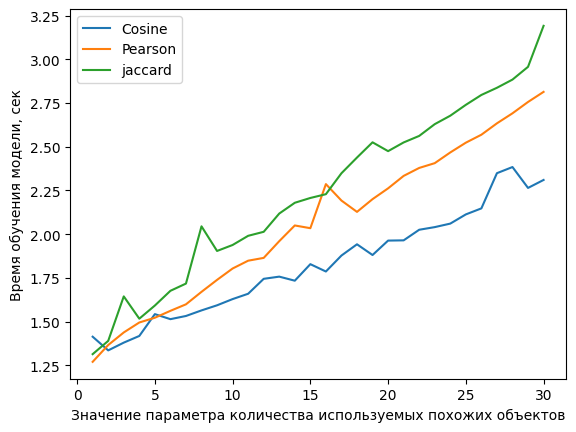

In [23]:

import matplotlib.pyplot as plt

plt.plot(x, times[0]["cosine"], label="Cosine")
plt.plot(x, times[0]["pearson"], label="Pearson")
plt.plot(x, times[0]["jaccard"], label="jaccard")
plt.legend()
plt.ylabel("Время обучения модели, сек")
plt.xlabel("Значение параметра количества используемых похожих объектов")
plt.show()

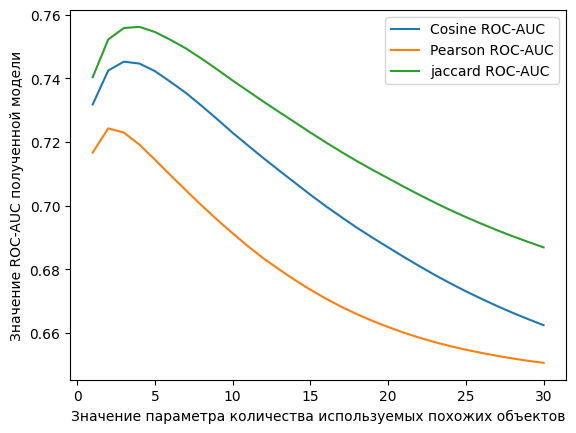

In [24]:

import matplotlib.pyplot as plt

plt.plot(x, times[1]["cosine"], label="Cosine ROC-AUC")
plt.plot(x, times[1]["pearson"], label="Pearson ROC-AUC")
plt.plot(x, times[1]["jaccard"], label="jaccard ROC-AUC")
plt.legend()
plt.ylabel("Значение ROC-AUC полученной модели")
plt.xlabel("Значение параметра количества используемых похожих объектов")
plt.show()

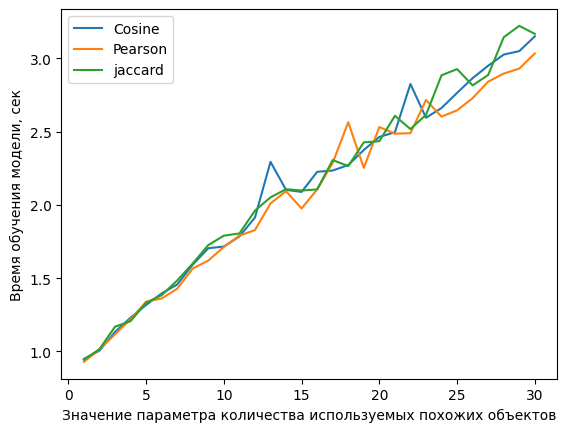

In [25]:

import matplotlib.pyplot as plt

plt.plot(x, times[2]["cosine"], label="Cosine")
plt.plot(x, times[2]["pearson"], label="Pearson")
plt.plot(x, times[2]["jaccard"], label="jaccard")
plt.legend()
plt.ylabel("Время обучения модели, сек")
plt.xlabel("Значение параметра количества используемых похожих объектов")
plt.show()

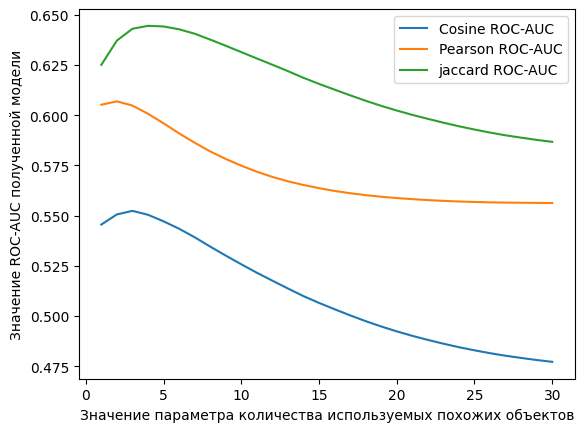

In [26]:
import matplotlib.pyplot as plt

plt.plot(x, times[3]["cosine"], label="Cosine ROC-AUC")
plt.plot(x, times[3]["pearson"], label="Pearson ROC-AUC")
plt.plot(x, times[3]["jaccard"], label="jaccard ROC-AUC")
plt.legend()
plt.ylabel("Значение ROC-AUC полученной модели")
plt.xlabel("Значение параметра количества используемых похожих объектов")
plt.show()